#Titanic Data Science

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  
import warnings
warnings.filterwarnings('ignore')
sns.reset_orig()

In [24]:
# Đọc bộ dữ liệu TITANIC (của thư viện seaborn) và lưu vào biến DataFrame tên titanic
titanic=sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


       count
who         
child     83
man      537
woman    271


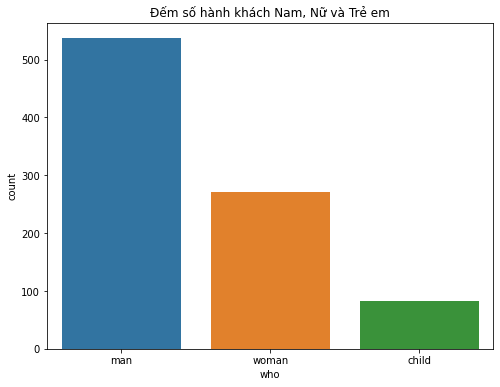

<Figure size 432x288 with 0 Axes>

In [25]:
# lập bảng thống kê khách theo giới tính
titanic_thongke = titanic.groupby('who').size().reset_index()
titanic_thongke.set_index('who',inplace=True)
titanic_thongke=titanic_thongke.rename(columns={0:'count'})
print(titanic_thongke)

#Vẽ biểu đồ bar chart theo giới tính khách
plt.figure(figsize=(8,6))

sns.countplot(data=titanic,
              x='who')
plt.title('Đếm số hành khách Nam, Nữ và Trẻ em')
plt.show()
plt.clf()

Nhận xét:
Nhìn qua biểu đồ thống kê, số hành khách nam chiếm tỷ lệ cao nhất trên tàu titacnic với 537 hành khách nam, tiếp đến là phụ nữ đúng vị trí thứ 2 với 271 hành khách, và trẻ con chiếm tỉ lệ ít nhất trong tổng lượng hành khách có trên tàu titanic.

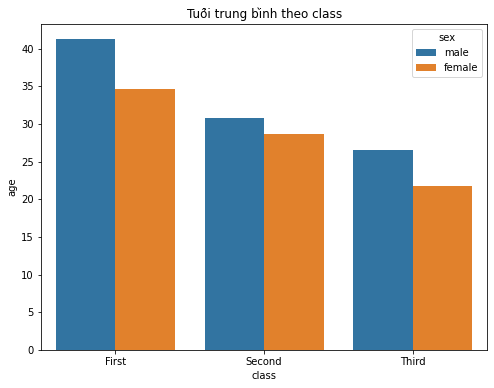

<Figure size 432x288 with 0 Axes>

In [26]:
# Vẽ biểu đồ tuổi trung bình theo class
plt.figure(figsize=(8,6))
sns.barplot(data=titanic,
              x='class',y='age',hue='sex',ci=None)
plt.title("Tuổi trung bình theo class")

plt.show()
plt.clf()

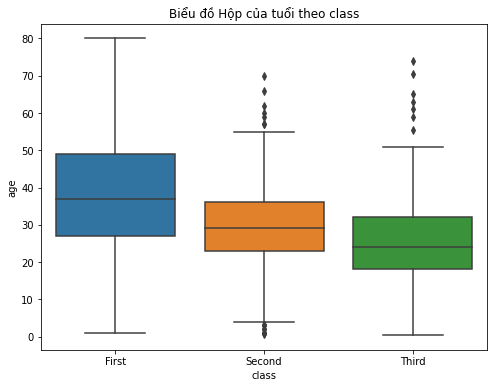

<Figure size 432x288 with 0 Axes>

In [27]:
# Vẽ biểu đồ độ tuổi theo class và nhận xét
plt.figure(figsize=(8,6))
sns.boxplot(data=titanic,x='class',y='age')
plt.title('Biểu đồ Hộp của tuổi theo class')
plt.show()
plt.clf()

 # Biểu đồ cho thấy:
   - Tuổi ở class First nằm trong khoảng gần 30 đến 50, có mean, meadian cao hơn những class còn lại
   - Tuổi ở class Third nằm trong khoảng gần 20 đến 35 ,có mean, meadian thấp hơn những class còn lại
   - Class Sencond và Third có outliers. Dữ liệu Titanic cần được xử lý

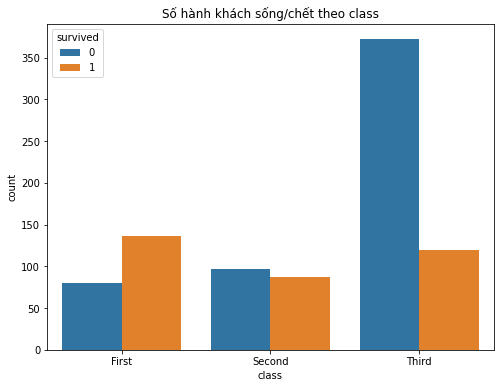

<Figure size 432x288 with 0 Axes>

In [28]:
# Vẽ biểu đồ thể hiện số hành khách sống/ chết theo class
plt.figure(figsize=(8,6))
sns.countplot(data=titanic,
              x='class',hue='survived')
plt.title('Số hành khách sống/chết theo class')
plt.legend(title='survived',loc=2)
plt.show()
plt.clf()

 Nhận xét:
 Từ các biểu đồ thống kê mô tả, có thể thấy được số lượng người chết nhiều nhất lại rơi vào nhóm tuổi thứ 3 (nhóm tuổi từ 20-35 tuổi)

In [29]:
# Lập bảng thống kê số hành khách/ tỷ lệ sống chết theo mỗi class
titanic_=titanic
result = titanic_.pivot_table(index='class', columns='survived', aggfunc={'survived': np.size })
result=result['survived']

result['0 %']=round(result[0]/(result[0]+result[1]),2)
result['1 %']=round(result[1]/(result[0]+result[1]),2)
result

survived,0,1,0 %,1 %
class,,,,
First,80,136,0.37,0.63
Second,97,87,0.53,0.47
Third,372,119,0.76,0.24


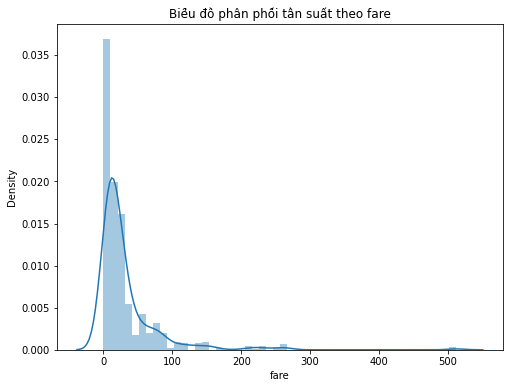

<Figure size 432x288 with 0 Axes>

In [30]:
# Vẽ biểu đồ phân phối tần suất theo fare và cho nhận xét
plt.figure(figsize=(8,6))
sns.distplot(titanic['fare'])
plt.title("Biểu đồ phân phối tần suất theo fare")
plt.show()
plt.clf()


#Nhận xét: 
- Biểu đồ phân phối tần xuất cho thấy đường cong lệch dương. Giá vé đa phần nằm trong khoảng dưới 30. 
- Giá vé cao nhất trên 500.

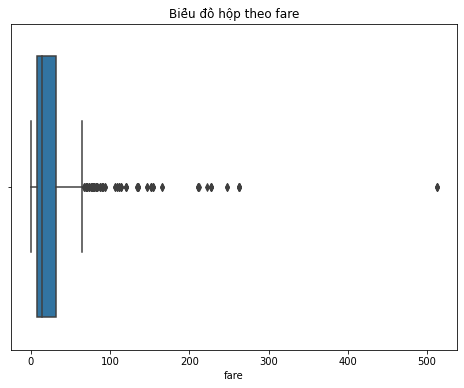

<Figure size 432x288 with 0 Axes>

In [31]:
#Biểu đồ boxplot theo fare
plt.figure(figsize=(8,6))
sns.boxplot(data=titanic,x='fare')
plt.title("Biểu đồ hộp theo fare")
plt.show()
plt.clf()

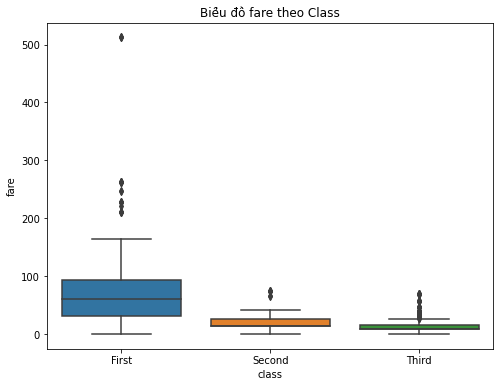

<Figure size 432x288 with 0 Axes>

In [32]:
# Vẽ biểu đồ fare theo từng class
plt.figure(figsize=(8,6))
sns.boxplot(data=titanic,y='fare',x='class')
plt.title("Biểu đồ fare theo Class")
plt.show()
plt.clf()

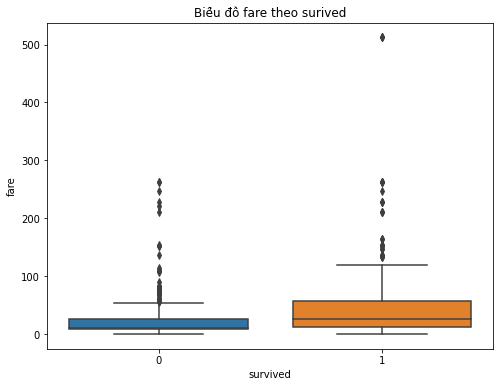

<Figure size 432x288 with 0 Axes>

In [33]:
#10. Vẽ biểu đồ thể hiện mối tương quan giữa fare và surived
plt.figure(figsize=(8,6))
sns.boxplot(data=titanic,y='fare',x='survived')
plt.title("Biểu đồ fare theo surived")
plt.show()
plt.clf()

Nhận xét:
Observations.

- Higher fare paying passengers had better survival. 
- Class, Fare, Sex correlates with survival rates.